# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import librariesimport pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Your code here
df = pd.read_csv('data_all.zip', nrows=75000)

In [3]:
df.head(50)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.dtypes

e      float64
1      float64
2      float64
3      float64
4      float64
        ...   
780    float64
781    float64
782    float64
783    float64
784    float64
Length: 785, dtype: object

In [5]:
data = df.values
data.shape

(75000, 785)

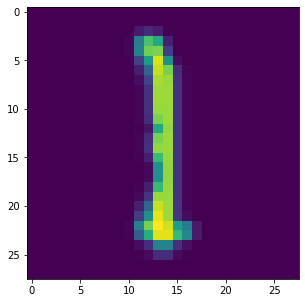

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(data[12,1:].reshape(28,28))  #para mostrar pixeles
plt.show()

In [7]:
alfabeto={0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9',
          10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J',
          20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T',
          30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z',
          36:'a', 37:'b', 38:'c', 39:'d', 40:'e', 41:'f', 42:'g', 43:'h', 44:'i', 45:'j',
          46:'k', 47:'l', 48:'m', 49:'n', 50:'o', 51:'p', 52:'q', 53:'r', 54:'s', 55:'t',
          56:'u', 57:'v', 58:'w', 59:'x', 60:'y', 61:'z'}

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [8]:
# Your code here
#Uppercases
upper=df.loc[(df.e>=10) & (df.e<36)]
upper.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
upper_data=upper.values #te regresa un array
upper_data.shape

(20136, 785)

In [10]:
X=upper_data[:,1:]/255 #RGB colores totales 255 y se divide para normalizar y que sea 0/1
y=upper_data[:,0]

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape

(16108, 784)

In [12]:
rf=RandomForestClassifier(n_estimators=1000, max_depth=5).fit(X_train, y_train)


In [13]:
classification_report(y_test, rf.predict(X_test))

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n        10.0       0.66      0.60      0.63       139\n        11.0       1.00      0.01      0.02        82\n        12.0       0.57      0.87      0.69       232\n        13.0       0.00      0.00      0.00       100\n        14.0       0.92      0.22      0.36       109\n        15.0       0.69      0.58      0.63       172\n        16.0       0.00      0.00      0.00        65\n        17.0       0.00      0.00      0.00        77\n        18.0       0.48      0.86      0.62       262\n        19.0       0.00      0.00      0.00        96\n        20.0       0.00      0.00      0.00        61\n        21.0       0.92      0.21      0.34       105\n        22.0       0.71      0.88      0.78       172\n        23.0       0.56      0.77      0.65       171\n        24.0       0.66      0.96      0.78       523\n        25.0       0.74      0.83      0.78       193\n        26.0       0.00      0.00      0.00        46\n       

* Try to do the same thing with lowercases.

In [14]:
# Your code here
lower=df.loc[df.e>35]
lower.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
lower_data=lower.values
lower_data.shape

(17400, 785)

In [16]:
X=lower_data[:,1:]/255

In [17]:
y=lower_data[:,0]

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape

(13920, 784)

In [19]:
svc=SVC(gamma='auto').fit(X_train, y_train)

In [20]:
classification_report(y_test, svc.predict(X_test))

'              precision    recall  f1-score   support\n\n        36.0       0.67      0.89      0.76       180\n        37.0       0.86      0.84      0.85       114\n        38.0       0.79      0.49      0.61        47\n        39.0       0.85      0.90      0.87       220\n        40.0       0.91      0.94      0.93       557\n        41.0       0.86      0.64      0.74        50\n        42.0       0.55      0.58      0.57        81\n        43.0       0.76      0.85      0.81       177\n        44.0       1.00      0.02      0.03        62\n        45.0       0.90      0.65      0.75        40\n        46.0       0.67      0.47      0.55        55\n        47.0       0.75      0.96      0.84       334\n        48.0       0.94      0.86      0.90        59\n        49.0       0.85      0.85      0.85       254\n        50.0       0.91      0.88      0.90        68\n        51.0       0.90      0.57      0.70        65\n        52.0       0.61      0.29      0.40        65\n       

In [21]:
from sklearn.naive_bayes import GaussianNB as GNB

gnb=GNB()

gnb.fit(X_train, y_train)

train_score=gnb.score(X_train, y_train) # Accuracy
test_score=gnb.score(X_test, y_test)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.35804597701149427 -- test Acc: 0.3422413793103448


In [22]:
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
from sklearn.naive_bayes import MultinomialNB as MNB
mnb=MNB()

mnb.fit(X_train, y_train)

train_score=mnb.score(X_train, y_train) # Accuracy
test_score=mnb.score(X_test, y_test)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.671264367816092 -- test Acc: 0.6609195402298851


In [26]:
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

* Try to do the same thing with numbers.

In [27]:
# Your code here

In [28]:
number=df.loc[df.e<10]
number.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
number_data=number.values
number_data.shape

(37464, 785)

In [30]:
X=number_data[:,1:]/255
y=number_data[:,0]

In [31]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape

(29971, 784)

In [32]:
logreg=LogisticRegression(C=0.01, penalty='l2', tol=0.0001, max_iter=70,
                          solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
classification_report(y_test, logreg.predict(X_test))

'              precision    recall  f1-score   support\n\n         0.0       0.95      0.95      0.95       765\n         1.0       0.95      0.97      0.96       853\n         2.0       0.94      0.91      0.93       764\n         3.0       0.92      0.91      0.92       758\n         4.0       0.89      0.90      0.90       753\n         5.0       0.89      0.88      0.88       662\n         6.0       0.96      0.96      0.96       716\n         7.0       0.95      0.94      0.94       802\n         8.0       0.88      0.89      0.89       719\n         9.0       0.90      0.91      0.90       701\n\n    accuracy                           0.92      7493\n   macro avg       0.92      0.92      0.92      7493\nweighted avg       0.92      0.92      0.92      7493\n'